In [2]:
from keras import models, layers
from keras.datasets import boston_housing
import numpy as np

Using TensorFlow backend.


In [3]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [4]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [5]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [6]:
k = 4
num_val = len(train_data) // k
num_epochs = 100
all_mae = []

In [8]:
import tqdm
for i in tqdm.tqdm(range(k)):
    val_data = train_data[i*num_val:(i+1)*num_val]
    val_labels = train_labels[i*num_val:(i+1)*num_val]
    
    partial_train = np.concatenate([train_data[:i*num_val], train_data[(i+1)*num_val:]], 
                                   axis=0)
    partial_labels = np.concatenate([train_labels[:i*num_val], train_labels[(i+1)*num_val:]], 
                                    axis=0)
    
    history = model.fit(partial_train, partial_labels, epochs=num_epochs, batch_size=1, 
                        validation_data=(val_data, val_labels), verbose=False)
    val_mae = history.history['val_mean_absolute_error']
    all_mae.append(val_mae)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [02:12<00:00, 33.04s/it]


In [9]:
average_mae = [np.mean([x[i] for x in all_mae]) for i in range(num_epochs)]

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
len(average_mae)

200

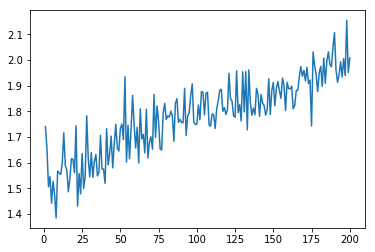

In [12]:
plt.plot(range(1, num_epochs+1), average_mae)

In [13]:
def smooth_curve(points, factor=0.9):
    smooth_points = []
    for point in points:
        if smooth_points:
            previous = smooth_points[-1]
            cur_point = previous * factor + point * (1 - factor)
            smooth_points.append(cur_point)
        else:
            smooth_points.append(point)
    return smooth_points

In [14]:
smooth_ave_mae = smooth_curve(average_mae)

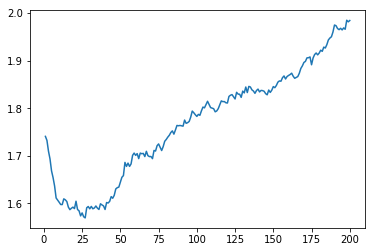

In [16]:
plt.plot(range(1, num_epochs+1), smooth_ave_mae)

In [17]:
np.argmin(smooth_ave_mae)

26